<a href="https://colab.research.google.com/github/veritaem/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Copy_of_High_Dimensional_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

In [64]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 4.7MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.decomposition import PCA
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
x = np.arange(1, 100, 1)
y = [1] * 99

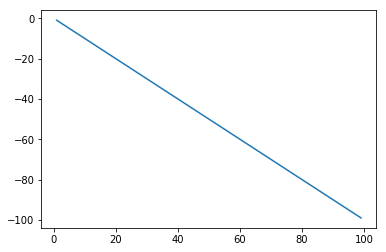

In [3]:
plt.plot(x, -x)

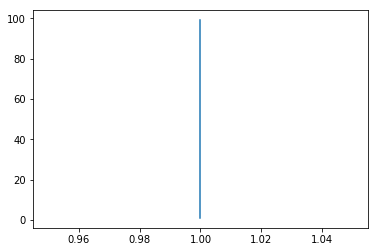

In [4]:
plt.plot(y, x)

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

A function needs to take an input and return a single output.  If an equation(terminology ok?) has 2+ values for any x then it means that when you plug that x intot he equation you cant be sure of your result, making the equation ambiguous.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

In [0]:
only relation 2 is a function, because its x(input) values have unique y(output) values 

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

In [0]:
the dimensionality of the domain is R3, the codomain is R2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

In [0]:
no, without information as to where exactly it lies in the higher dimension it becomes ambiguous

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
\\
\begin{bmatrix} 1\\-1 \end{bmatrix} +
 \begin{bmatrix} 3\\2 \end{bmatrix} =
\begin{bmatrix} 1& 3\\-1 & 2 \end{bmatrix}
\\
\end{align}

\begin{align}
\begin{bmatrix} 4\\-1\\5 \end{bmatrix} + \begin{bmatrix} 1\\ 2\\ 1 \end{bmatrix} + \begin{bmatrix} 2\\ 3\\-2 \end{bmatrix} = \begin{bmatrix} 4&1&2\\-1&2&3\\5&1&-2 \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

\begin{align}
f(\begin{bmatrix} 3\\4 \end{bmatrix}) = \begin{bmatrix} 15\\5 \end{bmatrix}
\\
\\
f(\begin{bmatrix} 3\\4\\5 \end{bmatrix}) = \begin{bmatrix} 26\\20\\ 9 \end{bmatrix}
\end{align}

In [8]:
x = np.mat('3;4')
y = np.mat('3;4;5')
xT = np.mat('1 3;-1 2')
yT = np.mat('4 1 2;-1 2 3;5 1 -2')
print(np.matmul(xT, x))
print(np.matmul(yT, y))

[[15]
 [ 5]]
[[26]
 [20]
 [ 9]]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

In [0]:
eigenvalues are the amount that you scale an eigenvector by in order to create some linear transformation of a matrix.  

for instance, if your matrix transformed through some function by becoming 3 times as long, but not changing
its height, we can say the eigenvalue is 3, and any vactor lying horizontally acts as an eigenvector.

essentially this means an eigenvector is only mushed or pulled apart, not rotated (except 180 degrees via scaling by a negative)

# The Curse of Dimensionality

![alt text](https://erikbern.com/assets/2015/10/curse-of-dimensionality.png)

## 6.1 What are some of the challenges of working with high dimensional spaces?

In [0]:
extremely hard to visualize, the math gets very tangly, cross streams and mess up time, 
and in order to create order out of it sometimes you will have to eliminate information

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

In [0]:
at least 5 observations per parameter added.  I wont complain if you do more though..

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [12]:
csv = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv'
df = pd.read_csv(csv)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [58]:
X = df.iloc[:,0:4].values
Y = df['species'].values
pca = PCA(2)
pca.fit(X)
print('Eigenvectors', pca.components_, '\n')
print('Eigenvalues', pca.explained_variance_, '\n')
new = pca.transform(X)
newx, newy = np.split(new,[-1],axis=1)
newb = pd.DataFrame(new, Y)
newb['species']= newb.index
newb

Eigenvectors [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]] 

Eigenvalues [4.22484077 0.24224357] 



,0,1,species
setosa,-2.684207,0.326607,setosa
setosa,-2.715391,-0.169557,setosa
setosa,-2.889820,-0.137346,setosa
setosa,-2.746437,-0.311124,setosa
setosa,-2.728593,0.333925,setosa
setosa,-2.279897,0.747783,setosa
setosa,-2.820891,-0.082105,setosa
setosa,-2.626482,0.170405,setosa
setosa,-2.887959,-0.570798,setosa
setosa,-2.673845,-0.106692,setosa


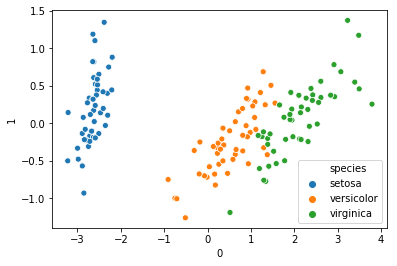

In [61]:
sns.scatterplot(newb[0], newb[1], hue = newb['species']);

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)